# 회귀의 주요 평가지표(accuracy 아님)
- MSE : 오차의 제곱의 합의 평균
    - mean_squared_error()
    - neg_mean_squared_error : 그리드서치에서 스코어링 지정할때 문자열로 줘야할때.
- ASE : 오차의 절대값의 평균. 잘 안씀
- RMSE : MSE의 제곱근.
    - MSE 구한후 np.sqrt() 로 계산
- R2 :결정게수
 - r2_score()
 - 분자 : 평균으로 예측한 부분보다 모델이 더 잘 예측한 부분/
 - 분모 : 실제값 - 평균, 즉 평균으로 예측할 때 오차
 - 높을수록 예측 잘해

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [7]:
X,y = make_regression(n_samples = 100,
                     n_features = 1,
                     n_informative = 1,
                     noise = 50,
                     coef = False,
                     random_state = 1)

In [8]:
X.shape, y.shape

((100, 1), (100,))

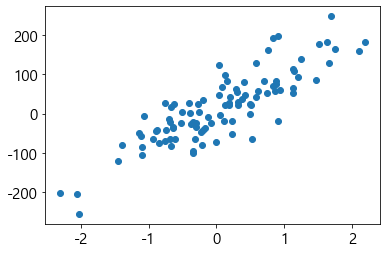

In [10]:
plt.scatter(X,y)

In [9]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(15.293427290684107,
 -255.11169199137663,
 247.19463389209255,
 20.62597485010551)

In [12]:
#선형회귀 모델 생성
lr = LinearRegression()
lr.fit(X,y) # 직선 방정식 찾도록 학습

LinearRegression()

In [13]:
#예측
pred = lr.predict(X)

In [14]:
pred.size

100

In [15]:
y

array([-6.47837150e+01,  3.53525698e+00, -2.24930988e+00,  1.60486845e+02,
        1.76846086e+02,  3.75120284e+01,  2.04399290e+01,  1.65475124e+01,
       -8.00299319e+01,  2.12950877e+01, -3.68533417e+01,  2.71863822e+01,
       -1.05041229e+02, -1.80445868e+01, -8.50723156e+01,  6.89340357e+01,
       -2.50673768e+01, -9.59581539e+01, -8.21563475e+01, -6.22450275e+00,
       -3.50170055e+01,  1.82489231e+02,  5.79386310e+01,  4.26634726e+01,
        1.30913351e-01, -2.09715557e+01, -4.01151102e+00,  4.08451522e+01,
        1.38282568e+02, -7.02177235e+01, -2.25347306e+01, -4.47436142e+01,
        2.42126703e+01,  8.16001763e+01,  1.91435758e+02,  4.32788040e+00,
       -9.92775395e+01,  2.47194634e+02, -2.02799798e+02,  5.85334904e+01,
        1.59536038e+02,  8.54897401e+01, -7.37592095e+01, -4.06447270e+01,
       -6.49055955e+01,  7.59577622e+01,  8.30410079e+01,  6.41532713e+01,
       -2.65508208e+01,  2.47503948e+01, -7.89972479e+01,  2.13397064e+01,
        1.27320816e+02,  

In [16]:
pred # 예측값

array([ -41.95321474,  -11.0976856 ,   51.73017859,   75.01687119,
        139.5405874 ,   42.28291757,   53.80872201,  -47.01849461,
       -108.77026334,   37.00995752,  -44.10222106,  -23.64669313,
        -83.57766397,   86.83887415,  -83.51568574,   80.63336112,
          3.700483  ,  -19.8574064 ,  -46.96878289,  -81.22334449,
        -15.93681229,  196.22691473,   83.82061032,   27.01939459,
        -22.56541616,  -48.08125722,   14.46112205,   59.75914659,
        116.81111848,  -54.09849447,  -19.60987796,  -65.4425124 ,
         26.01992906,   84.73688556,   81.57070811,  -32.8179105 ,
        -19.14251049,  154.23991252, -185.83051957,   89.41419524,
        188.96228033,  134.62693781,  -61.83035871,  -64.61059467,
        -17.31729207,   85.50083141,   23.76150326,  106.48818675,
        -21.8187411 ,   52.92018804,   -7.6513255 ,   20.36606229,
         60.08337862,   37.29980537,  -48.75670707,   69.56933678,
        112.21749699,   -6.95856797,   55.29243684,   73.31676

In [18]:
#평가 함수 생성
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y,pred)
r2 = r2_score(y,pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(y,pred))
print('R^2:', r2)

MSE: 2078.5472792307764
RMSE: 45.59108771712709
MAE: 34.84147804463735
R^2: 0.7321024057172182


In [20]:
#교차검증
score = cross_val_score(lr,
                       X,
                       y, 
                       cv = 5)

print(score)
print(np.mean(score)) # r2값 나옴 : 평균으로 에측한 것보다 68% 더 좋다

[0.58124097 0.82853824 0.52826294 0.76611492 0.7184243 ]
0.6845162761863837


In [23]:
#mse
cross = cross_val_score(lr,X,y, scoring = 'neg_mean_squared_error', cv = 10)*-1
cross

array([1882.70290581, 2859.09589717,  420.87862081, 3244.99975507,
       1404.5936989 , 2794.10631553, 1863.97405357, 1262.61248332,
       3714.70549983, 2626.12950655])

In [24]:
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([85.14546889]), 10.135071944054275)

In [25]:
X.shape, y.shape

((100, 1), (100,))

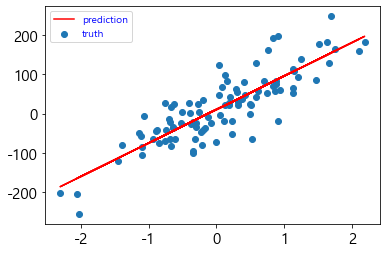

In [26]:
plt.scatter(X,y, label = 'truth')
y_hat = X*lr.coef_ + lr.intercept_
plt.plot(X, y_hat, color = 'red', label = 'prediction')
plt.legend()
plt.show()

In [29]:
lr.predict([[0]])

array([10.13507194])

# 기준 분류모델의 회귀 모델

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [34]:
knn_reg = KNeighborsRegressor(n_neighbors = 3)
tree_reg = DecisionTreeRegressor(max_depth = 5)
rf_rg = RandomForestRegressor(n_estimators = 300, max_depth = 2)
lr_reg = LinearRegression()

estimators = [('knn', knn_reg),('tree', tree_reg),('random_forest',rf_rg),('linear reg',lr_reg)]

In [36]:
# 평기지표 출력 함수
def print_metrics(y, y_pred, title = None):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    if title:
        print(title)
    print(f'mse:{mse}, rmse:{rmse}, r2{r2}')
    

In [39]:
#반복문 돌려서 모델별로 학습

for name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print_metrics(y_train, pred_train, name+'-train')
    print_metrics(y_test, pred_test, name +'-test')
    print("----------------------------------")
    
    

knn-train
mse:1427.767659021123, rmse:37.785812933178015, r20.8019417941941395
knn-test
mse:2864.855454376287, rmse:53.52434450207015, r20.6640766473771966
----------------------------------
tree-train
mse:817.4625116301221, rmse:28.59130132802846, r20.8866025873719422
tree-test
mse:3301.0727964279786, rmse:57.45496320099751, r20.6129272632816158
----------------------------------
random_forest-train
mse:1709.1924066973406, rmse:41.34238027372566, r20.7629028929822064
random_forest-test
mse:2948.00279308986, rmse:54.295513563183654, r20.6543270690032998
----------------------------------
linear reg-train
mse:2017.1792010802012, rmse:44.9130181693482, r20.7201793367215267
linear reg-test
mse:2368.5811126977082, rmse:48.6680707723011, r20.7222681140435795
----------------------------------


In [40]:
#votingregressor : 각 모델이 예측한 값(예측값 자체가 숫자)의 평균을 반환
knn_reg = KNeighborsRegressor(n_neighbors = 3)
tree_reg = DecisionTreeRegressor(max_depth = 5)
rf_rg = RandomForestRegressor(n_estimators = 300, max_depth = 2)
lr_reg = LinearRegression()

estimators = [('knn', knn_reg),('tree', tree_reg),('random_forest',rf_rg),('linear reg',lr_reg)]

vote_reg = VotingRegressor(estimators)
vote_reg.fit(X_train, y_train)
pred_train = vote_reg.predict(X_train)
pred_test = vote_reg.predict(X_test)

In [41]:
print_metrics(y_test, pred_test)

mse:2540.4034949689735, rmse:50.40241556680566, r20.7021207971449102


In [42]:
tree_reg = DecisionTreeRegressor(max_depth = 3)

In [43]:

tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

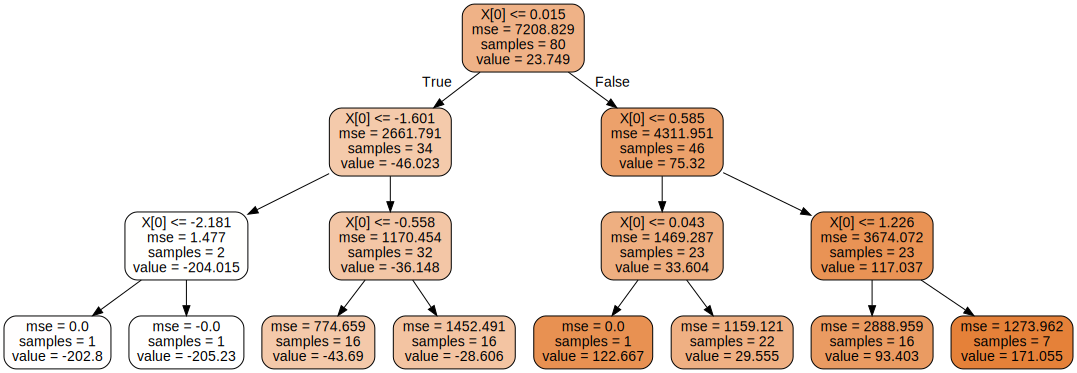

In [45]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree_reg,
                              out_file = None,
                              rounded = True, filled = True))
graph

In [51]:
np.mean(y_train[np.where(X_train<=0.015)[0]])

-46.0226932531074